In [3]:
%matplotlib inline

# PYTORCH：TENSORS AND AUTOGRAD

同样的问题，但这次我们用pytorch的qutograd来实现。

一个tensor代表着计算图中的一个节点。如果tensor``x``的.requires_grad=True，那么x.grad就保存着x关于某个标量的导数。

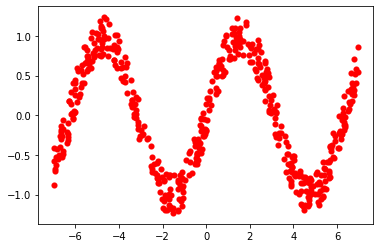

In [5]:
import torch 
import numpy as np
import matplotlib.pyplot as plt

dtype = torch.float
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') 

# N是batch_size； D_in是输入的维度
# H是隐层的维度；D_out是输出的维度
N, D_in, H, D_out = 512, 1, 100, 1

#创建数据集，y通过sin函数计算并加上部分噪声
x = np.random.rand(N, D_in)
x = (x - 0.5) * 14
y = np.sin(x) + (np.random.rand(N, D_out) - 0.5) * 0.5
plt.scatter(x,y,color="red", linewidth=0.1)
x = torch.from_numpy(x).type(dtype).to(device)
y = torch.from_numpy(y).type(dtype).to(device)

epoch: 0 loss: 107876.71875
epoch: 1000 loss: 43.176570892333984
epoch: 2000 loss: 33.43335723876953
epoch: 3000 loss: 28.622142791748047
epoch: 4000 loss: 25.15613555908203
epoch: 5000 loss: 22.026588439941406
epoch: 6000 loss: 19.109209060668945
epoch: 7000 loss: 17.3095703125
epoch: 8000 loss: 16.00240707397461
epoch: 9000 loss: 14.778131484985352
epoch: 10000 loss: 13.974579811096191
epoch: 11000 loss: 13.421520233154297
epoch: 12000 loss: 13.010540008544922
epoch: 13000 loss: 12.715471267700195
epoch: 14000 loss: 12.479551315307617
epoch: 15000 loss: 12.304778099060059
epoch: 16000 loss: 12.176523208618164
epoch: 17000 loss: 12.07539176940918
epoch: 18000 loss: 11.97661018371582
epoch: 19000 loss: 11.879705429077148
epoch: 20000 loss: 11.808077812194824
epoch: 21000 loss: 11.75412368774414
epoch: 22000 loss: 11.709614753723145
epoch: 23000 loss: 11.66334342956543
epoch: 24000 loss: 11.625308990478516
epoch: 25000 loss: 11.587821006774902
epoch: 26000 loss: 11.447145462036133
epoch

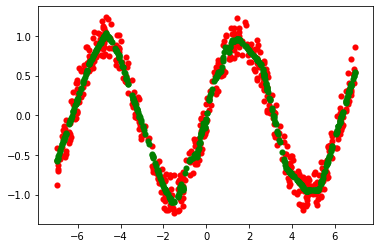

In [33]:
w1 = torch.randn(D_in, H, device=device, dtype=dtype, requires_grad=True)
b1 = torch.randn(H, device=device, dtype=dtype, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, dtype=dtype, requires_grad=True)
b2 = torch.randn(D_out, device=device, dtype=dtype, requires_grad=True)

lr_w = 1e-6
lr_b = 1e-5

for epoch in range(50000):
    y_pred = (x.mm(w1) + b1).clamp(min=0).mm(w2) + b2
    loss = (y_pred - y).pow(2).sum()
    if epoch % 1000 == 0:
        print("epoch:",epoch, "loss:", loss.item())
    
    loss.backward()
    
    with torch.no_grad():
        w1 -= lr_w * w1.grad
        b1 -= lr_b * b1.grad
        w2 -= lr_w * w2.grad
        b2 -= lr_b * b2.grad
        w1.grad.zero_()
        b1.grad.zero_()
        w2.grad.zero_()
        b2.grad.zero_()
    
y_pred = (x.mm(w1) + b1).clamp(min=0).mm(w2) + b2
plt.scatter(x.detach().cpu().numpy(),y.detach().cpu().numpy(),color="red", linewidth=0.1)
plt.scatter(x.detach().cpu().numpy(), y_pred.detach().cpu().numpy(), color='green', linewidth=0.1)

In [37]:
w1 = w1.detach().cpu().numpy()
b1 = b1.detach().cpu().numpy()
w2 = w2.detach().cpu().numpy()
b2 = b2.detach().cpu().numpy()
np.savez('./two_layers_net_autograd.npz', w1=w1, b1=b1, w2=w2, b2=b2)


AttributeError: 'numpy.ndarray' object has no attribute 'detach'

In [39]:
weights = np.load('./two_layers_net_autograd.npz')
w1 = weights['w1'].astype(np.float32)
b1 = weights['b1'].astype(np.float32)
w2 = weights['w2'].astype(np.float32)
b2 = weights['b2'].astype(np.float32)
w1 = torch.from_numpy(w1).to(device)
b1 = torch.from_numpy(b1).to(device)
w2 = torch.from_numpy(w2).to(device)
b2 = torch.from_numpy(b2).to(device)

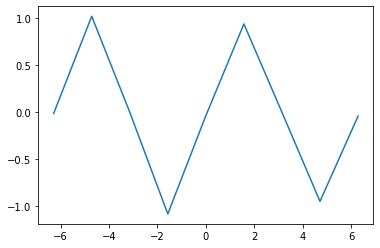

In [40]:
p = np.pi
x_test = torch.ones((9, 1), device=device, dtype=dtype)
for i in range(-4, 5, 1):
    x_test[i+4, 0] = i / 2 * p

y_groundtruth = torch.sin(x_test)
y_test = (x_test.mm(w1) + b1).clamp(min=0).mm(w2) + b2
plt.plot(x_test.cpu().numpy(), y_test.cpu().numpy())


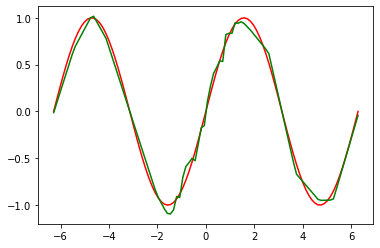

In [41]:
x_ = np.linspace(-2*p, 2*p, num=100)
x_ = x_.reshape((100, 1))
x_ = torch.from_numpy(x_).type(dtype).to(device)
y_true = torch.sin(x_)
y_ = (x_.mm(w1) + b1).clamp(min=0).mm(w2) + b2
plt.plot(x_.cpu().numpy(), y_true.cpu().numpy(), color='r')
plt.plot(x_.cpu().numpy(), y_.cpu().numpy(), color='g')

In [2]:
import torch
torch.optim.SGD?